In [3]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
#import hmmlearn
!pip install hmmlearn
from hmmlearn import hmm
from sklearn.preprocessing import StandardScaler


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.4/160.4 kB 4.2 MB/s eta 0:00:00


In [4]:
df= yf.download('^VIX', period = 'max', interval = '1d')
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1990-01-02,17.240000,17.240000,17.240000,17.240000,17.240000,0
1990-01-03,18.190001,18.190001,18.190001,18.190001,18.190001,0
1990-01-04,19.219999,19.219999,19.219999,19.219999,19.219999,0
1990-01-05,20.110001,20.110001,20.110001,20.110001,20.110001,0
1990-01-08,20.260000,20.260000,20.260000,20.260000,20.260000,0


In [5]:
df = df.reset_index()
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1990-01-02,17.240000,17.240000,17.240000,17.240000,17.240000,0
1,1990-01-03,18.190001,18.190001,18.190001,18.190001,18.190001,0
2,1990-01-04,19.219999,19.219999,19.219999,19.219999,19.219999,0
3,1990-01-05,20.110001,20.110001,20.110001,20.110001,20.110001,0
4,1990-01-08,20.260000,20.260000,20.260000,20.260000,20.260000,0


In [6]:
# Extract Relevent columns for training the HMM
X= np.column_stack([df['Close']])
X

array([[17.23999977],
       [18.19000053],
       [19.21999931],
       ...,
       [13.35000038],
       [12.85000038],
       [12.46000004]])

In [7]:
# Set Random seed
np.random.seed(69)


In [8]:
# Train the HMM Model
model = hmm.GaussianHMM(n_components=3, n_iter=1000) #covariance_type='full',
model.fit(X)

GaussianHMM(n_components=3, n_iter=1000)

In [9]:
hidden_states = model.predict(X)

In [12]:
from matplotlib.colors import ListedColormap

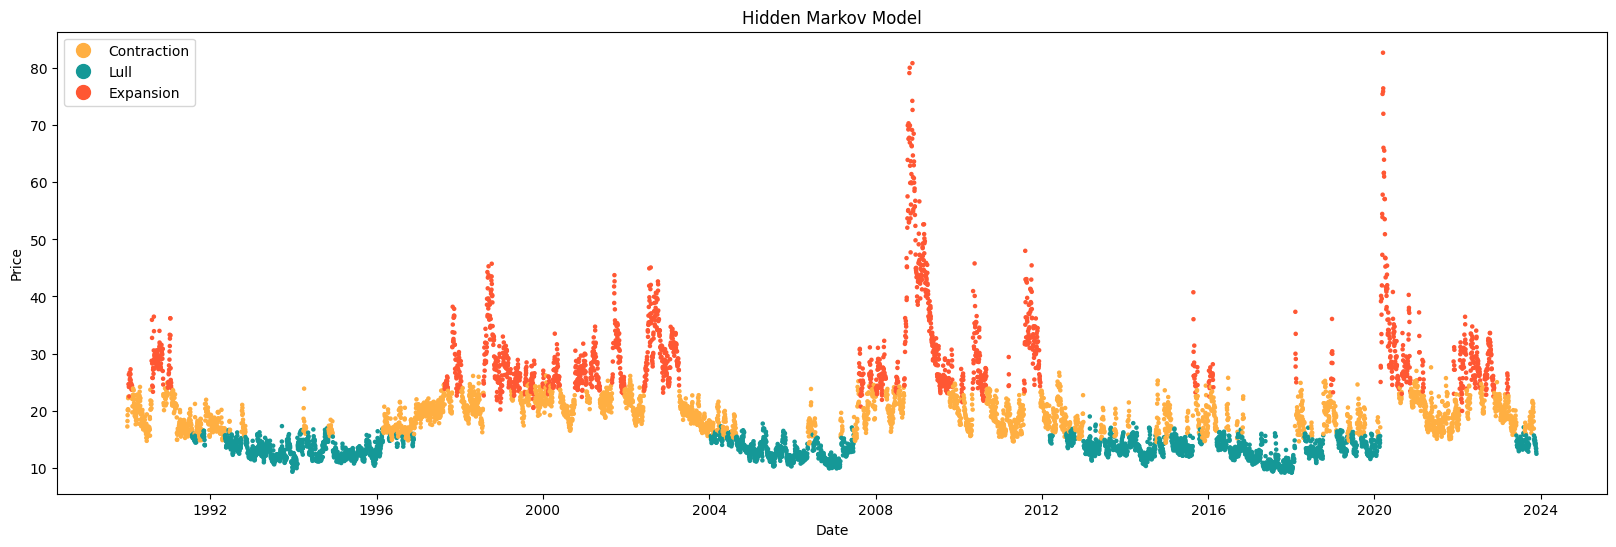

In [13]:
# Define the custom color map
colors = ['#FFAF42', '#159897', '#FF5733'] # red, orange, green
cmap = ListedColormap(colors[:3])

# Create custom legend handles and labels
unique_states = np.unique(hidden_states)
handles = [plt.Line2D([], [], marker='o', color=cmap(i), linewidth=0, markersize=10) for i in unique_states]
labels = ['Contraction', 'Lull', 'Expansion']

# Plot the price data, colored by the predicted hidden states
plt.figure(figsize=(20, 6))
plt.scatter(df['Date'], df['Close'], s=5, c=hidden_states, cmap=cmap)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Hidden Markov Model')
plt.legend(handles=handles, labels=labels, loc='upper left')
plt.show()